In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
sns.set()

In [3]:
raw_data = pd.read_csv("car_resale_prices.csv")
raw_data.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


In [4]:
raw_data.isnull().sum()

Unnamed: 0             0
full_name              0
resale_price           0
registered_year       69
engine_capacity       14
insurance              7
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power            102
seats                 10
mileage              508
body_type              0
city                   0
dtype: int64

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  object 
 3   registered_year    17377 non-null  object 
 4   engine_capacity    17432 non-null  object 
 5   insurance          17439 non-null  object 
 6   transmission_type  17446 non-null  object 
 7   kms_driven         17443 non-null  object 
 8   owner_type         17401 non-null  object 
 9   fuel_type          17446 non-null  object 
 10  max_power          17344 non-null  object 
 11  seats              17436 non-null  float64
 12  mileage            16938 non-null  object 
 13  body_type          17446 non-null  object 
 14  city               17446 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.0+ MB


In [6]:
raw_data.isnull().sum()
raw_data.shape

(17446, 15)

In [7]:
dataNoMv = raw_data.dropna(axis = 0)

In [8]:
dataNoMv.isnull().sum()

Unnamed: 0           0
full_name            0
resale_price         0
registered_year      0
engine_capacity      0
insurance            0
transmission_type    0
kms_driven           0
owner_type           0
fuel_type            0
max_power            0
seats                0
mileage              0
body_type            0
city                 0
dtype: int64

In [9]:
dataNoMv.describe(include = "all")

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
count,16792.000000,16792,16792,16792,16792,16792,16792,16792,16792,16792,16792,16792.000000,16792,16792,16792
unique,NaN,6555,1668,235,150,7,2,8124,5,5,581,NaN,585,25,13
top,NaN,2016 Hyundai Grand i10 Sportz,₹ 4.50 Lakh,2017,1197 cc,Third Party insurance,Manual,"1,20,000 Kms",First Owner,Petrol,81.80bhp,NaN,18.9 kmpl,Hatchback,Delhi
freq,NaN,51,216,380,3365,7230,12195,538,11807,11010,625,NaN,682,7191,2890
mean,8722.580395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.205872,NaN,NaN,NaN
std,5029.328675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660051,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
25%,4371.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN
50%,8727.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN
75%,13064.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN


In [10]:
dataNoMv.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


### kolom resaleprice

In [53]:
def convert_lakh_to_numeric(value):
    if isinstance(value, str):
        value = value.strip().lower()
        value = value.replace('₹', '').strip()
        
        if 'lakh' in value:
            value = value.replace('lakh', '').replace('.', '').replace(',', '')
            try:
                return pd.to_numeric(value, errors='coerce') * 100000
            except ValueError:
                return pd.NA
        else:
            value = value.replace(',', '')
            try:
                return pd.to_numeric(value, errors='coerce')
            except ValueError:
                return pd.NA
    else:
        return pd.NA

# Assuming dataNoMv is your DataFrame
data_resalePrice = dataNoMv['resale_price'].apply(convert_lakh_to_numeric)
dataResalePrice = pd.to_numeric(data_resalePrice, errors='coerce')

data1 = dataNoMv.copy()
data1["resale_price"] = dataResalePrice

In [55]:
data1.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,54500000.00,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.00,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,1000000.00,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.00,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,45000000.00,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.00,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,45000000.00,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.00,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,16000000.00,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.00,19.81 kmpl,Hatchback,Agra


C:\Users\arsya\AppData\Local\Temp\ipykernel_7496\522746699.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1["resale_price"])


<Axes: xlabel='resale_price', ylabel='Density'>

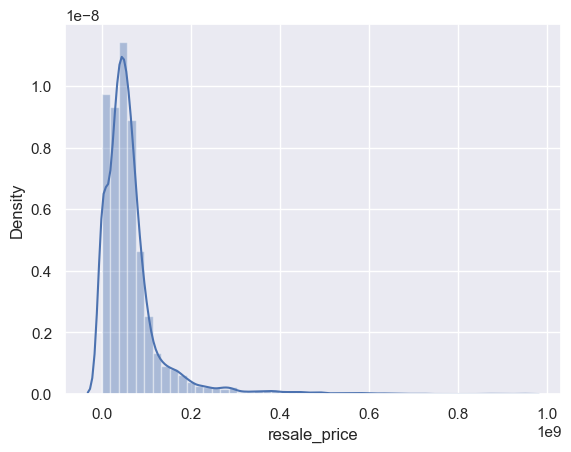

In [56]:
sns.distplot(data1["resale_price"])

In [57]:
pd.set_option('display.float_format', '{:.2f}'.format)
data1.describe(include = "all")

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
count,16792.00,16792,16775.00,16792,16792,16792,16792,16792,16792,16792,16792,16792.00,16792,16792,16792
unique,NaN,6555,NaN,235,150,7,2,8124,5,5,581,NaN,585,25,13
top,NaN,2016 Hyundai Grand i10 Sportz,NaN,2017,1197 cc,Third Party insurance,Manual,"1,20,000 Kms",First Owner,Petrol,81.80bhp,NaN,18.9 kmpl,Hatchback,Delhi
freq,NaN,51,NaN,380,3365,7230,12195,538,11807,11010,625,NaN,682,7191,2890
mean,8722.58,NaN,65285231.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.21,NaN,NaN,NaN
std,5029.33,NaN,74885058.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.66,NaN,NaN,NaN
min,0.00,NaN,28000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN
25%,4371.75,NaN,27500000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN
50%,8727.50,NaN,49600000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN
75%,13064.25,NaN,76500000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN


In [58]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16792 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         16792 non-null  int64  
 1   full_name          16792 non-null  object 
 2   resale_price       16775 non-null  float64
 3   registered_year    16792 non-null  object 
 4   engine_capacity    16792 non-null  object 
 5   insurance          16792 non-null  object 
 6   transmission_type  16792 non-null  object 
 7   kms_driven         16792 non-null  object 
 8   owner_type         16792 non-null  object 
 9   fuel_type          16792 non-null  object 
 10  max_power          16792 non-null  object 
 11  seats              16792 non-null  float64
 12  mileage            16792 non-null  object 
 13  body_type          16792 non-null  object 
 14  city               16792 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 2.0+ MB


In [59]:
q = data1["resale_price"].quantile(0.99)
data2 = data1[data1["resale_price"]<q]
data2.describe(include = 'all')

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
count,16605.00,16605,16605.00,16605,16605,16605,16605,16605,16605,16605,16605,16605.00,16605,16605,16605
unique,NaN,6458,NaN,235,147,7,2,8098,5,5,566,NaN,571,25,13
top,NaN,2016 Hyundai Grand i10 Sportz,NaN,2017,1197 cc,Third Party insurance,Manual,"1,20,000 Kms",First Owner,Petrol,81.80bhp,NaN,18.9 kmpl,Hatchback,Delhi
freq,NaN,51,NaN,379,3365,7175,12193,538,11659,10947,625,NaN,682,7191,2826
mean,8709.32,NaN,60463936.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.20,NaN,NaN,NaN
std,5015.53,NaN,56874384.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.66,NaN,NaN,NaN
min,0.00,NaN,28000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN
25%,4376.00,NaN,27200000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN
50%,8705.00,NaN,49400000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN
75%,13027.00,NaN,75000000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN


C:\Users\arsya\AppData\Local\Temp\ipykernel_7496\3801428683.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2["resale_price"])


<Axes: xlabel='resale_price', ylabel='Density'>

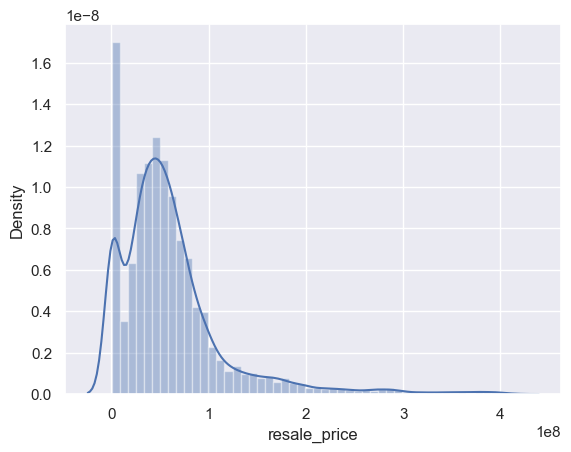

In [60]:
sns.distplot(data2["resale_price"])

### kolom year

In [61]:
data3 = data2.copy()
year = pd.to_datetime(data3["registered_year"], format = 'mixed')

In [62]:
data3["registered_year"] = year

In [63]:
data3.describe(include = "all")

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
count,16605.00,16605,16605.00,16605,16605,16605,16605,16605,16605,16605,16605,16605.00,16605,16605,16605
unique,NaN,6458,NaN,NaN,147,7,2,8098,5,5,566,NaN,571,25,13
top,NaN,2016 Hyundai Grand i10 Sportz,NaN,NaN,1197 cc,Third Party insurance,Manual,"1,20,000 Kms",First Owner,Petrol,81.80bhp,NaN,18.9 kmpl,Hatchback,Delhi
freq,NaN,51,NaN,NaN,3365,7175,12193,538,11659,10947,625,NaN,682,7191,2826
mean,8709.32,NaN,60463936.23,2016-08-21 18:40:26.016259840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.20,NaN,NaN,NaN
min,0.00,NaN,28000.00,2002-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN
25%,4376.00,NaN,27200000.00,2014-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN
50%,8705.00,NaN,49400000.00,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN
75%,13027.00,NaN,75000000.00,2019-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN
max,17445.00,NaN,414900000.00,2023-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.00,NaN,NaN,NaN


In [64]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16605 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         16605 non-null  int64         
 1   full_name          16605 non-null  object        
 2   resale_price       16605 non-null  float64       
 3   registered_year    16605 non-null  datetime64[ns]
 4   engine_capacity    16605 non-null  object        
 5   insurance          16605 non-null  object        
 6   transmission_type  16605 non-null  object        
 7   kms_driven         16605 non-null  object        
 8   owner_type         16605 non-null  object        
 9   fuel_type          16605 non-null  object        
 10  max_power          16605 non-null  object        
 11  seats              16605 non-null  float64       
 12  mileage            16605 non-null  object        
 13  body_type          16605 non-null  object        
 14  city       

### kolom Engine Capacity

In [65]:
data_Engine= pd.to_numeric(data3["engine_capacity"].replace(r'[^0-9\.\-]', '', regex=True))
data3["engine_capacity"] = data_Engine

In [66]:
data3.head(2)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,54500000.00,2017-01-01,1197,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.00,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,1000000.00,2018-01-01,2179,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.00,17.6 kmpl,MUV,Agra


In [67]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16605 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         16605 non-null  int64         
 1   full_name          16605 non-null  object        
 2   resale_price       16605 non-null  float64       
 3   registered_year    16605 non-null  datetime64[ns]
 4   engine_capacity    16605 non-null  int64         
 5   insurance          16605 non-null  object        
 6   transmission_type  16605 non-null  object        
 7   kms_driven         16605 non-null  object        
 8   owner_type         16605 non-null  object        
 9   fuel_type          16605 non-null  object        
 10  max_power          16605 non-null  object        
 11  seats              16605 non-null  float64       
 12  mileage            16605 non-null  object        
 13  body_type          16605 non-null  object        
 14  city       

In [68]:
data3.shape

(16605, 15)

### kolom mileage

In [69]:
data4 = data3.copy()

In [70]:
Correct_Mileage= []
for i in data4.mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-4]
        #print(i)
        Correct_Mileage.append(float(i))
data4['mileage']= Correct_Mileage

In [71]:
data4.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,54500000.00,2017-01-01,1197,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.00,21.40,Hatchback,Agra
1,1,2018 Tata Hexa XTA,1000000.00,2018-01-01,2179,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.00,17.60,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,45000000.00,2015-01-01,1197,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.00,20.85,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,45000000.00,2015-01-01,1197,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.00,20.85,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,16000000.00,2009-01-01,1086,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.00,19.81,Hatchback,Agra


In [72]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16605 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         16605 non-null  int64         
 1   full_name          16605 non-null  object        
 2   resale_price       16605 non-null  float64       
 3   registered_year    16605 non-null  datetime64[ns]
 4   engine_capacity    16605 non-null  int64         
 5   insurance          16605 non-null  object        
 6   transmission_type  16605 non-null  object        
 7   kms_driven         16605 non-null  object        
 8   owner_type         16605 non-null  object        
 9   fuel_type          16605 non-null  object        
 10  max_power          16605 non-null  object        
 11  seats              16605 non-null  float64       
 12  mileage            16605 non-null  float64       
 13  body_type          16605 non-null  object        
 14  city       

### kolom kms driven

In [73]:
data5 = data4.copy()
data_kms  = pd.to_numeric(data5["kms_driven"].replace(r'[^0-9\.\-]', '', regex=True))
data5["kms_driven"]=data_kms

In [74]:
data5.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,54500000.00,2017-01-01,1197,Third Party insurance,Manual,40000,First Owner,Petrol,83.1bhp,5.00,21.40,Hatchback,Agra
1,1,2018 Tata Hexa XTA,1000000.00,2018-01-01,2179,Third Party insurance,Automatic,70000,First Owner,Diesel,153.86bhp,7.00,17.60,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,45000000.00,2015-01-01,1197,Third Party insurance,Manual,70000,Second Owner,Petrol,83.14bhp,5.00,20.85,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,45000000.00,2015-01-01,1197,Third Party insurance,Manual,70000,Second Owner,Petrol,83.14bhp,5.00,20.85,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,16000000.00,2009-01-01,1086,Third Party insurance,Manual,80000,First Owner,Petrol,68.05bhp,5.00,19.81,Hatchback,Agra


In [75]:
data5.describe(include = "all")

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
count,16605.00,16605,16605.00,16605,16605.00,16605,16605,16605.00,16605,16605,16605,16605.00,16605.00,16605,16605
unique,NaN,6458,NaN,NaN,NaN,7,2,NaN,5,5,566,NaN,NaN,25,13
top,NaN,2016 Hyundai Grand i10 Sportz,NaN,NaN,NaN,Third Party insurance,Manual,NaN,First Owner,Petrol,81.80bhp,NaN,NaN,Hatchback,Delhi
freq,NaN,51,NaN,NaN,NaN,7175,12193,NaN,11659,10947,625,NaN,NaN,7191,2826
mean,8709.32,NaN,60463936.23,2016-08-21 18:40:26.016259840,1408.20,NaN,NaN,59127.68,NaN,NaN,NaN,5.20,19.55,NaN,NaN
min,0.00,NaN,28000.00,2002-01-01 00:00:00,0.00,NaN,NaN,300.00,NaN,NaN,NaN,2.00,6.70,NaN,NaN
25%,4376.00,NaN,27200000.00,2014-05-01 00:00:00,1197.00,NaN,NaN,33411.00,NaN,NaN,NaN,5.00,17.00,NaN,NaN
50%,8705.00,NaN,49400000.00,2017-01-01 00:00:00,1199.00,NaN,NaN,55760.00,NaN,NaN,NaN,5.00,19.00,NaN,NaN
75%,13027.00,NaN,75000000.00,2019-05-01 00:00:00,1498.00,NaN,NaN,80000.00,NaN,NaN,NaN,5.00,21.66,NaN,NaN
max,17445.00,NaN,414900000.00,2023-08-01 00:00:00,5998.00,NaN,NaN,3350000.00,NaN,NaN,NaN,14.00,140.00,NaN,NaN


In [76]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16605 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         16605 non-null  int64         
 1   full_name          16605 non-null  object        
 2   resale_price       16605 non-null  float64       
 3   registered_year    16605 non-null  datetime64[ns]
 4   engine_capacity    16605 non-null  int64         
 5   insurance          16605 non-null  object        
 6   transmission_type  16605 non-null  object        
 7   kms_driven         16605 non-null  int64         
 8   owner_type         16605 non-null  object        
 9   fuel_type          16605 non-null  object        
 10  max_power          16605 non-null  object        
 11  seats              16605 non-null  float64       
 12  mileage            16605 non-null  float64       
 13  body_type          16605 non-null  object        
 14  city       

### kolom max power

In [97]:
data6 = data5.copy()
data6['max_power'] = (
    data6['max_power'].str.extract('(\d+\.?\d*)')  # Extract numeric part (with optional decimal point)
    .astype(float)  # Convert to float
)

In [98]:
data6['max_power'].head()

0    83.10
1   153.86
2    83.14
3    83.14
4    68.05
Name: max_power, dtype: float64

In [99]:
data6.describe(include = "all")

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
count,16605.00,16605,16605.00,16605,16605.00,16605,16605,16605.00,16605,16605,16605.00,16605.00,16605.00,16605,16605
unique,NaN,6458,NaN,NaN,NaN,7,2,NaN,5,5,NaN,NaN,NaN,25,13
top,NaN,2016 Hyundai Grand i10 Sportz,NaN,NaN,NaN,Third Party insurance,Manual,NaN,First Owner,Petrol,NaN,NaN,NaN,Hatchback,Delhi
freq,NaN,51,NaN,NaN,NaN,7175,12193,NaN,11659,10947,NaN,NaN,NaN,7191,2826
mean,8709.32,NaN,60463936.23,2016-08-21 18:40:26.016259840,1408.20,NaN,NaN,59127.68,NaN,NaN,101.23,5.20,19.55,NaN,NaN
min,0.00,NaN,28000.00,2002-01-01 00:00:00,0.00,NaN,NaN,300.00,NaN,NaN,25.50,2.00,6.70,NaN,NaN
25%,4376.00,NaN,27200000.00,2014-05-01 00:00:00,1197.00,NaN,NaN,33411.00,NaN,NaN,78.90,5.00,17.00,NaN,NaN
50%,8705.00,NaN,49400000.00,2017-01-01 00:00:00,1199.00,NaN,NaN,55760.00,NaN,NaN,88.50,5.00,19.00,NaN,NaN
75%,13027.00,NaN,75000000.00,2019-05-01 00:00:00,1498.00,NaN,NaN,80000.00,NaN,NaN,117.60,5.00,21.66,NaN,NaN
max,17445.00,NaN,414900000.00,2023-08-01 00:00:00,5998.00,NaN,NaN,3350000.00,NaN,NaN,552.00,14.00,140.00,NaN,NaN


In [100]:
data6.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,54500000.00,2017-01-01,1197,Third Party insurance,Manual,40000,First Owner,Petrol,83.10,5.00,21.40,Hatchback,Agra
1,1,2018 Tata Hexa XTA,1000000.00,2018-01-01,2179,Third Party insurance,Automatic,70000,First Owner,Diesel,153.86,7.00,17.60,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,45000000.00,2015-01-01,1197,Third Party insurance,Manual,70000,Second Owner,Petrol,83.14,5.00,20.85,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,45000000.00,2015-01-01,1197,Third Party insurance,Manual,70000,Second Owner,Petrol,83.14,5.00,20.85,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,16000000.00,2009-01-01,1086,Third Party insurance,Manual,80000,First Owner,Petrol,68.05,5.00,19.81,Hatchback,Agra


In [101]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16605 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         16605 non-null  int64         
 1   full_name          16605 non-null  object        
 2   resale_price       16605 non-null  float64       
 3   registered_year    16605 non-null  datetime64[ns]
 4   engine_capacity    16605 non-null  int64         
 5   insurance          16605 non-null  object        
 6   transmission_type  16605 non-null  object        
 7   kms_driven         16605 non-null  int64         
 8   owner_type         16605 non-null  object        
 9   fuel_type          16605 non-null  object        
 10  max_power          16605 non-null  float64       
 11  seats              16605 non-null  float64       
 12  mileage            16605 non-null  float64       
 13  body_type          16605 non-null  object        
 14  city       

In [103]:
data6.shape

(16605, 15)

In [105]:
data_cleaned = data6.copy()

In [108]:
numericData = data_cleaned.select_dtypes(include = ['float64', 'int64'])
numericData.corr()

,Unnamed: 0,resale_price,engine_capacity,kms_driven,max_power,seats,mileage
Unnamed: 0,1.00,0.12,0.07,-0.05,0.08,0.03,-0.05
resale_price,0.12,1.00,0.36,-0.12,0.44,0.15,-0.20
engine_capacity,0.07,0.36,1.00,0.16,0.85,0.46,-0.52
kms_driven,-0.05,-0.12,0.16,1.00,0.03,0.11,-0.04
max_power,0.08,0.44,0.85,0.03,1.00,0.21,-0.52
seats,0.03,0.15,0.46,0.11,0.21,1.00,-0.29
mileage,-0.05,-0.20,-0.52,-0.04,-0.52,-0.29,1.00


<Axes: xlabel='max_power', ylabel='Count'>

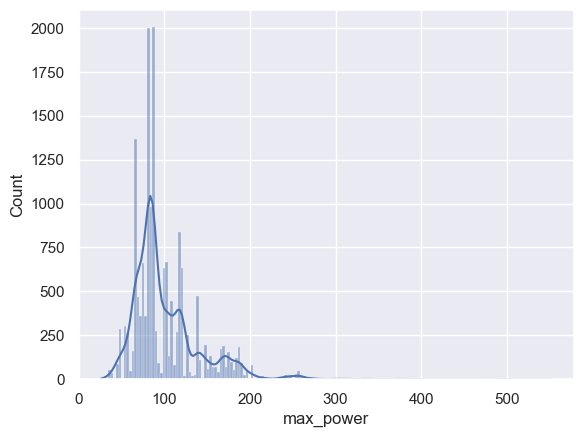

In [140]:
sns.histplot(data_cleaned['max_power'], kde = True)

In [114]:
data_cleaned['resale_price'].max().index

414900000.0

In [112]:
data_cleaned['resale_price'].min()

28000.0

In [123]:
data_cleaned['resale_price'].nsmallest(1)

2508   28000.00
Name: resale_price, dtype: float64

Series([], Name: count, dtype: int64)
